In [1]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection, LineCollection
from matplotlib.patches import Polygon
from shapely.geometry import Point, LineString, MultiPolygon, MultiLineString, shape

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [17]:
%run simulator.py

In [18]:
car_artists = {}
def draw_road(ax, road, x, y, cell_size, is_ani):
    if not is_ani:
        ax.plot([x*cell_size, (x+road.length)*cell_size], [-y*cell_size, -y*cell_size], "black",
               linewidth=1)
        ax.plot([x*cell_size, (x+road.length)*cell_size],
                [(-y-road.nlane)*cell_size, (-y-road.nlane)*cell_size], "black", linewidth=1)

        for i in range(1, road.nlane):
            ax.plot([x*cell_size, (x+road.length)*cell_size], [(-y-i)*cell_size, (-y-i)*cell_size], 
                    "b--", linewidth=1, alpha=0.6)
        
    xs = []
    ys = []
    for i, lane in enumerate(road.lanes):
        for vehicle in lane.queue:
            xs.append((x + vehicle.position + 0.5) * cell_size)
            ys.append((-y - i - 0.5)*cell_size)
    
    if not is_ani:
        artist = ax.plot(xs, ys, "r>", markersize=3)
        car_artists[id(road)] = artist[0]
    else:
        car_artists[id(road)].set_data(xs, ys)
    

def draw_simulation_world(ax, world, *, cell_size=10, is_ani=False):
    road1, road2, road3 = world.roads[:3]
    ramp1, ramp2 = world.roads[3:]
    width = (road1.length + road2.length + road3.length) * cell_size
    
    if not is_ani:
        ax.clear()
        ax.set_xlim(-20, width+20)
        ax.set_ylim(-100, 100)
        ax.set_aspect(1)
        
    if not is_ani:
        artist = ax.text(10, 60, "time step:{}".format(world.time))
        print(artist)
        car_artists["time"] = artist
    else:
        car_artists["time"].set_text("time step:{}".format(world.time))
    
    draw_road(ax, road1, 0, 0, cell_size, is_ani)
    draw_road(ax, road2, road1.length, 0, cell_size, is_ani)
    draw_road(ax, road3, road1.length+road2.length, 0, cell_size, is_ani)
    draw_road(ax, ramp1, road1.length-ramp1.length, 3, cell_size, is_ani)
    draw_road(ax, ramp2, road1.length+road2.length, 3, cell_size, is_ani)

In [19]:
world = World(lc_type="passive")
road1 = world.add_road(50, 3)
road2 = world.add_road(30, 4)
road3 = world.add_road(50, 3)
ramp1 = world.add_road(40, 1)
ramp2 = world.add_road(40, 1)

source1 = world.add_source(1.0)
source2 = world.add_source(4.0)

road1.connect(road2, 0)
road2.connect(road3, 0)
ramp1.connect(road2, 3)
road2.connect(ramp2, -3)

source1.connect(road1)
source2.connect(ramp1)

In [20]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

draw_simulation_world(ax, world, is_ani=False)
def update(frame):
    draw_simulation_world(ax, world, is_ani=True)
    world.step()
    return list(car_artists.values())
    
ani = FuncAnimation(fig, update, frames=60, blit=True)
ani.save("simulation.mp4", fps=5)

Text(10,60,'time step:0')
Vehicle (140295644981576) 0 -> 20
Vehicle (140295644981864) 4 -> 22
Vehicle (140295644982056) 6 -> 24
Vehicle (140295644981192) 3 -> 25
Vehicle (140295644981768) 0 -> 25
Vehicle (140295644981480) 3 -> 26
Vehicle (140295644981672) 4 -> 30
Vehicle (140295644982248) 7 -> 30
Vehicle (140295644981960) 5 -> 30
Vehicle (140295644982440) 9 -> 31
Vehicle (140295644982152) 6 -> 31
Vehicle (140295644982344) 8 -> 32
Vehicle (140295644982536) 10 -> 34
Vehicle (140295644982920) 13 -> 35
Vehicle (140295644982632) 11 -> 38
Vehicle (140295644983016) 15 -> 38
Vehicle (140295644983208) 19 -> 39
Vehicle (140295644982728) 12 -> 39
Vehicle (140295644983112) 18 -> 41
Vehicle (140295644982824) 14 -> 44
Vehicle (140295644536904) 19 -> 45
Vehicle (140295644982056) 25 -> 51
Vehicle (140295644538440) 43 -> 60


In [16]:
!ffmpeg -i simulation.mp4 -f image2pipe -vcodec ppm - | convert -delay 5 -loop 0 - gif:- | convert -layers Optimize - output.gif    

ffmpeg version 4.0 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 8.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvenc --enable-omx --enable-shared --enable-version3
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    

In [13]:
for i in range(40):
    world.step()
    #for lane in road2.lanes:
    #    print(lane.queue)
    #print("----")

Vehicle (140107658260728) 421 -> 447
Vehicle (140107660925504) 434 -> 455
Vehicle (140107660926208) 430 -> 456
Vehicle (140107658261168) 435 -> 457
Vehicle (140107660533432) 444 -> 460
Vehicle (140107660533696) 444 -> 467
Vehicle (140107660532640) 446 -> 468
Vehicle (140107660926384) 453 -> 470
Vehicle (140107658260728) 451 -> 478
Vehicle (140107660533432) 462 -> 478
Vehicle (140107660926208) 457 -> 479
Vehicle (140107658261168) 460 -> 479


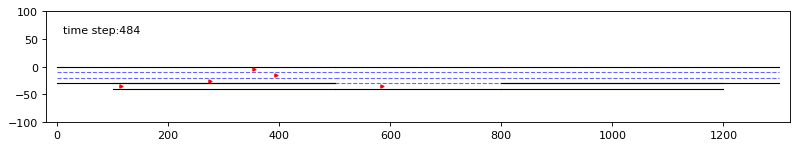

In [20]:
fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
draw_simulation_world(ax, world)
plt.show()

In [9]:
world.roads[1].lanes[0].queue[0].information

IndexError: list index out of range

In [ ]:
%pdb